<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Mr. Samiei
</font>
<br/>
<br/>

Spring 2023

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1 - 
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Esfand 5th - 
                <br/><b>
                <br>
              Cheating is Strongly Prohibited - 
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Question 1 (27+5 points)

## Imports

Feel free to import any library you need.

In [3]:
import numpy as np
from queue import PriorityQueue
import heapq

In this question, we are going to find the gold! The map_list contains a map of Mr. Samiei's personal garden from the surface to a depth of 16 meters. We know that there is a large piece of gold on this map but Mr. Samiei himself has absolutely no idea about what is going on beneath his garden yet. So we can't waste any time.

We have a guess about the location of the gold but we can't take any risks. Hence we will find our way with the Heuristic Search (informed), and the Iterative Deepening Search (uninformed). But first, let's take a quick look at the map.

## Making our map

This part is for loading the map and choosing the start point. The first row is the deepest layer and the last row is the surface. As we can see, there is only one entrance at the surface because the blocks with '#' are very hard and we can't pass them. You can transform this map into any other data structure you want and use it to solve the problem.

In [4]:
map_list = []
map_list.append(['#', '#', '#', '#', '#', '#', '#', '#', '#'])
map_list.append(['#', '$', '#', '$', '$', '$', '$', '$', '#'])
map_list.append(['#', '$', '$', '$', '$', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', 'G', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '#', '#', '$', '#'])
map_list.append(['#', '$', '#', '#', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '$', '$', '#', '$', '#'])
map_list.append(['#', '$', '$', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '$', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '$', '#', '$', '#', '$', '#', '$', '#'])
map_list.append(['#', '#', '#', '#', '#', '#', '#', 'E', '#'])

for floor in map_list:
    print(floor)
# '#' is a hard path and you can't pass
# '$' is a soft path and you can dig it
# 'G' is our goal
# 'E' is the only entrance

['#', '#', '#', '#', '#', '#', '#', '#', '#']
['#', '$', '#', '$', '$', '$', '$', '$', '#']
['#', '$', '$', '$', '$', '$', '#', '$', '#']
['#', '$', '#', 'G', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '#', '#', '$', '#']
['#', '$', '#', '#', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '$', '$', '#', '$', '#']
['#', '$', '$', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '$', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '$', '#', '$', '#', '$', '#', '$', '#']
['#', '#', '#', '#', '#', '#', '#', 'E', '#']


In [5]:
# Start point of problem
initial_point = (15, 7)
map_list[15][7]

'E'

We start with the first approach. In an uninformed search, we have to forget about our guess for the location of the gold and search until we find the 'G'.

## Iterative Deepening Search (Uninformed) (+5 points)

In this section, we have two functions for you and you have to complete the second one. You have to use the DLS function in the IDS function to find the shortest path length and we have already provided the expected output at the end of this section. Remember that you don't need to return the path, we only need the length and the total steps of this algorithm.

In [6]:
def DLS(problem_map, start_point, max_depth):
    if problem_map[start_point[0]][start_point[1]] == '#':
        return (False, 0)
    total_steps = 1
    if problem_map[start_point[0]][start_point[1]] == 'G':
        return (True, total_steps)
    if max_depth <= 0:
        return (False, total_steps)
    if start_point[0] < 15:
        result = DLS(problem_map, (start_point[0] + 1, start_point[1]), max_depth - 1)
        total_steps += result[1]
        if result[0]:
            return (True, total_steps)
    if start_point[0] > 0:
        result = DLS(problem_map, (start_point[0] - 1, start_point[1]), max_depth -1 )
        total_steps += result[1]
        if result[0]:
            return (True, total_steps)
    if start_point[1] > 0:
        result = DLS(problem_map, (start_point[0], start_point[1] - 1), max_depth - 1)
        total_steps += result[1]
        if result[0]:
            return (True, total_steps)
    if start_point[0] < 8:
        result = DLS(problem_map, (start_point[0], start_point[1] - 1), max_depth - 1)
        total_steps += result[1]
        if result[0]:
            return (True, total_steps)
    return (False, total_steps)
# print(DLS(map_list,initial_point,50))

In [7]:
def IDS(problem_map, start_point, max_depth):
    # (5 points)
    # The output must be in this form: (True or False, the shortest path length, total steps until finding the gold)
    total_steps = 0
    # this_depth = 0
    for depth in range(1,max_depth+1):
        ans = DLS(problem_map,initial_point,depth)
        total_steps += ans[1]
        if ans[0]:
            return (True,depth,total_steps)
    # Your code here
    
    return (False, 0, total_steps)

In [8]:
answer_IDS = IDS(map_list, initial_point, 50)
if answer_IDS[0]:
    print(f'The IDS algorithm found the shortest path of length {answer_IDS[1]} in {answer_IDS[2]} steps.')
else:
    print('No way!')

The IDS algorithm found the shortest path of length 20 in 1168122 steps.


Now we will find the shortest path length using Manhattan heuristic:

## Heuristic Search (Informed) (27 points)

Like the previous section, we have to empty functions to complete and you can use the answer at the end of this section to check your outputs.

In [9]:
# Goal point of problem
goal = (3, 3)
map_list[3][3]

'G'

In [10]:
# Manhattan Heuristic
def h(current_point, goal_point):
    # (2 points)
    D = 1
    h = (abs(goal_point[0] - current_point[0]),abs(goal_point[1] - current_point[1]))
    return D * (h[0] + h[1])

In [11]:
def Heuristic_search(problem_map, start_point, goal_point):
    # (25 point)
    # The output must be in this form: (True or False, the shortest path length, total steps until finding the gold)
    frontier = PriorityQueue()
    seen_points = []
    total_steps = 0
    shortest_path = 0
    frontier.put((shortest_path + h(start_point,goal_point),shortest_path,start_point,h(start_point,goal_point)))
    seen_points.append(start_point)
    current_point = start_point
    while not frontier.qsize() == 0 :
        node = frontier.get()
        current_point = node[2]
        shortest_path = node[1]
        if current_point == goal_point:
            shortest_path
            break   
        man_dist1 = h((current_point[0] + 1,current_point[1]),goal_point)
        man_dist2 = h((current_point[0],current_point[1] - 1),goal_point)
        man_dist3 = h((current_point[0] - 1,current_point[1]),goal_point)
        man_dist4 = h((current_point[0],current_point[1] + 1),goal_point)
        total_steps +=1
        if current_point[0] < 15 and problem_map[current_point[0] + 1][current_point[1]] != '#' and (current_point[0] + 1,current_point[1]) not in seen_points:
            frontier.put((shortest_path+man_dist1,shortest_path+1,(current_point[0] + 1,current_point[1]),man_dist1))
            seen_points.append((current_point[0] + 1,current_point[1]))
        if current_point[1] > 0 and problem_map[current_point[0]][current_point[1] - 1] != '#' and (current_point[0] ,current_point[1] - 1) not in seen_points:
            frontier.put((shortest_path+man_dist2,shortest_path+1,(current_point[0] ,current_point[1] - 1),man_dist2))
            seen_points.append((current_point[0] ,current_point[1] - 1))
        if current_point[0] > 0 and problem_map[current_point[0] -1 ][current_point[1]] != '#' and (current_point[0] - 1,current_point[1]) not in seen_points:
            frontier.put((shortest_path+man_dist3,shortest_path+1,(current_point[0] - 1,current_point[1]),man_dist3))
            seen_points.append((current_point[0] - 1,current_point[1]))
        if current_point[0] < 8 and problem_map[current_point[0] ][current_point[1] + 1] != '#' and (current_point[0] ,current_point[1] + 1) not in seen_points:
            frontier.put((shortest_path+man_dist4,shortest_path+1,(current_point[0] ,current_point[1] + 1),man_dist4))
            seen_points.append((current_point[0] ,current_point[1] + 1))
    return (current_point == goal_point,shortest_path,total_steps)

In [12]:
answer_HS = Heuristic_search(map_list, initial_point, goal)
if answer_HS[0]:
    print(f'The Heuristic algorithm found the shortest path of length {answer_HS[1]} in {answer_HS[2]} steps.')
else:
    print('No way!')

The Heuristic algorithm found the shortest path of length 20 in 38 steps.


# Question 2 (19+23 points)

## Imports

Feel free to import any library you need.

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In this question, we want to solve a scheduling problem for those students who have a lot of available courses to take and don't know how to fit them into their weekly plans! In fact, we need them to provide us with a list of courses with a rating for every course which indicates the tendency of taking that course. Then we use Genetic Algorithm and Simulated Annealing to arrange their weekly plans with the most desired courses from the given least without any conflicts.

## Test Data

In the cell below we have a code that generates a random acceptable course list to test your implemented code. According to the current parameters, we have 5 active days every week and every day has 6 free time slots. Also, we have three types of courses to define:
- type 1: Sessions on days 1 and 3 of every week with one timeslot per day. For example, the second timeslot of days 1 and 3.
- type 2: Sessions on days 2 and 4 of every week with one timeslot per day. For example, the third timeslot of days 1 and 3.
- type 3: Sessions on any active day of every week with two consecutive timeslots. For example, the second and third timeslots of day 3.

In [14]:
# Generating data
num_courses = 20
daily_timeslots = 6
active_week_days = 5
courses_rating_range = 5
courses = []
for i in range(num_courses):
    course_type = np.random.randint(3)
    if course_type == 0:
        courses.append([[1, 3], [np.random.randint(daily_timeslots) + 1], np.random.randint(courses_rating_range) + 1])
    elif course_type == 1:
        courses.append([[2, 4], [np.random.randint(daily_timeslots) + 1], np.random.randint(courses_rating_range) + 1])
    else:
        time_slot = np.random.randint(daily_timeslots - 1) + 1
        courses.append([[np.random.randint(active_week_days) + 1], [time_slot, time_slot + 1], np.random.randint(courses_rating_range) + 1])
courses

[[[2, 4], [5], 1],
 [[2, 4], [4], 5],
 [[2], [4, 5], 4],
 [[5], [5, 6], 1],
 [[3], [5, 6], 5],
 [[2, 4], [6], 3],
 [[2, 4], [4], 1],
 [[1, 3], [6], 5],
 [[1, 3], [4], 1],
 [[1], [5, 6], 1],
 [[4], [1, 2], 4],
 [[1], [2, 3], 5],
 [[1], [4, 5], 4],
 [[1], [5, 6], 2],
 [[2, 4], [2], 5],
 [[2, 4], [6], 2],
 [[1, 3], [5], 1],
 [[2, 4], [3], 4],
 [[2, 4], [4], 5],
 [[3], [5, 6], 2]]

Representation of the output is a one-dimensional list of 0s and 1s with the length of num_courses. For every taken course from the courses list, we put a 1 at the corresponding index in the output list and a 0 for the courses that are not taken. 

In [15]:
# Sample output
sample_output = [np.random.randint(2) for _ in range(num_courses)]
sample_output

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

Now lets start with Genetic algorithm.

## Genetic algorithm (+23 points)

In every iteration of the genetic algorithm, we have a population of solutions. Then we apply selection, crossover, and mutation operations on the current population to generate the next generation in order to find better solutions for our problem. But first, we need an initial population.

Complete the below function that takes the size of the population and the number of courses in our list and returns a random population:

In [16]:
def initial_population(population_size, num_courses):
    # (3 points)
    # returns a list random solutions with size of num_courses
    zeroth_generation = []
    for i in range(population_size):
        zeroth_generation.append([np.random.randint(2) for _ in range(num_courses)])
    return zeroth_generation

After generating the zeroth generation, we need a fitness function to measure how good every solution is. One good approach is to aggregate ratings of all taken courses and determine the fitness as below. You can see if we have any time conflicts in output, the fitness function returns zero. Hence, the best solution should have fitness greater than zero and it means that there are conflicts between chosen courses in our solution. 

\begin{equation}
Fitness=   \left\{
\begin{array}{ll}
      \sum \text{Ratings of taken courses} & \text{no conflicts in the given schedule} \\
      0 & \text{o.w.}
\end{array} 
\right.
\end{equation}

Now, complete the function below that takes a generation of solutions as input and returns a list of fitnesses for that generation:

In [17]:
def fitness(courses, generation, daily_timeslots, active_week_days):
    # (5 points)
    fitness_list = []
    # Your code here
    for gene in generation:
        schedule = []
        is_conflict = False
        for i in range(active_week_days):
            schedule.append([0 for _ in range(daily_timeslots)])
        gene_fitness = 0
        for i in range(len(gene)):
            if gene[i] == 1:
                days = courses[i][0]
                times = courses[i][1]
                for day in days:
                    for time in times:
                        if schedule[day - 1][time - 1] == 1:
                            is_conflict = True
                        schedule[day - 1][time - 1] = 1
                gene_fitness += courses[i][2]
                
        if is_conflict:
            fitness_list.append(0)
        else:
            fitness_list.append(gene_fitness)
                        
    return fitness_list

Here we have three functions: selection, crossover, and mutation. The selection function takes a generation and its corresponding fitness list as input and returns a population called parents which will be used in the crossover function to generate the next generation. The method of our selection is Roulette Wheel and you have to implement this method here.

In [18]:
# # Roulette Wheel Selection
def selection(generation, fitness_list):
    # (6 points)
    parents = []
    selection_probs = []
    all_prob = []
    all_nums = 0
    final_nums = []
    total_fitness = sum(fitness_list)
    for i in range(len(generation)):
        selection_prob = fitness_list[i]/(total_fitness + 1)
        if selection_prob == 0 :
            selection_prob  = 0.15
        selection_probs.append(selection_prob)
        for j in range(int(selection_prob * 100)):
            all_prob.append(generation[i])
        all_nums += int(selection_prob * 100)
        # if rnd <= selection_probs * 5 :
        #     parents.append(generation[i])
    random.shuffle(all_prob)
    for i in range(len(generation)) :
        parents.append(all_prob[np.random.randint(all_nums - 1)])
    return parents

In the crossover function, we take generated parents from the selection part and do a crossover from a random index for every consecutive pair. Be aware that every parent in the parents list belongs to exactly one pair.

In [19]:
def crossover(parents):
    # (4 points)
    new_generation = []

    for i in range(0, len(parents) - 1, 2):
        crossover_indx = np.random.randint(len(parents[i]) - 1)
        p0a = parents[i][0:crossover_indx]
        p0b = parents[i][crossover_indx:]
        p1a = parents[i+1][0:crossover_indx]
        p1b = parents[i+1][crossover_indx:]
        child1 = p0a + p1b
        child2 = p1a + p0b
        new_generation.append(child1)
        new_generation.append(child2)
    if len(new_generation) < len(parents):
        new_generation.append(parents[-1])
    return new_generation

And at the final step, the mutation function takes the generation as input and for every solution in the generation, randomly chooses an index, and if the value is 0 changes it to 1 and vice versa.

In [20]:
def mutation(generation):
    # (3 points)
    for gene in generation:
       rnd_change = np.random.randint(len(gene)-1)
       if gene[rnd_change] == 1:
            gene[rnd_change] = 0
       else :
            gene[rnd_change] = 1
    return generation

Now we can complete our genetic function using above functions:

In [21]:
def genetic(courses, daily_timeslots, active_week_days, population_size=50, max_generation=2290, mutation_prob=0.1):
    # This function do seletion, crossover, and mutation for max_generation number of iterations
    # Note that in every iteration apply mutation only with probability of mutation_prob
    population = initial_population(population_size, len(courses))
    fitness_list = fitness(courses, population, daily_timeslots, active_week_days)
    best_fitness = max(fitness_list)
    best_plan = population[np.argmax(fitness_list)]
    best_fitness_list = []
    for i in range(max_generation):
        population = crossover(selection(population, fitness_list))
        p = np.random.rand()
        if p > mutation_prob:
            population = mutation(population)
        fitness_list = fitness(courses, population, daily_timeslots, active_week_days)
        generation_best_fitness = max(fitness_list)
        if best_fitness < generation_best_fitness:
            best_fitness = generation_best_fitness
            best_plan = population[np.argmax(fitness_list)]
        best_fitness_list.append(max(fitness_list))
    
    return best_fitness_list, best_fitness, best_plan

In [320]:
best_fitness_list, best_fitness, best_plan = genetic(courses, daily_timeslots, active_week_days)

In [321]:
print(best_fitness)
print(best_plan)

33
[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [322]:
# Write a code to show our best_plan in a two-dimensional list. (2 points)
# You can fill free timeslots with 0 and busy timeslots with 1.
# Your code here
schedule1 = []
is_conflict = False
for i in range(active_week_days):
    schedule1.append([0 for _ in range(daily_timeslots)])
gene_fitness = 0
for i in range(len(best_plan)):
    if best_plan[i] ==1:
        for day in courses[i][0]:
            for time in courses[i][1]:
                schedule1[day-1][time-1] = 1
schedule1

[[0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1]]

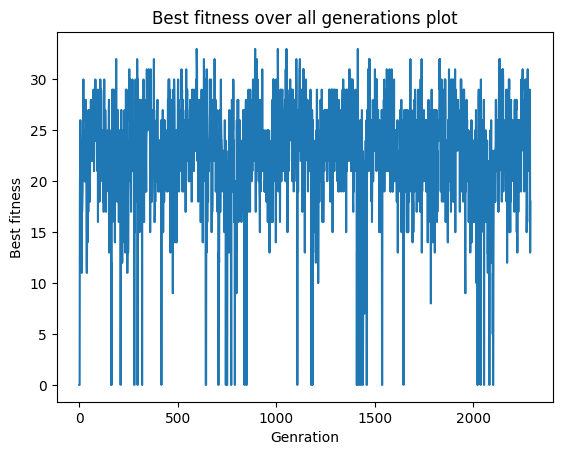

In [323]:
# Plot best_fitness_list over generations.
plt.plot(list(range(1, len(best_fitness_list) + 1)), best_fitness_list)
plt.xlabel('Genration')
plt.ylabel('Best fitness')
plt.title('Best fitness over all generations plot')
plt.show()

## Simulated Annealing (19 points)

In simulated annealing, we start from a random initial state and try to reach better states. Every state is a solution to our problem or in the other words a list of 0s and 1s that shows which courses are taken by the student. We are only allowed to move from the current state to one of the neighbor states or stay in the current state. we will explain more about how exactly we are going to take our moves, but first, we need to choose our start state.

Complete the function below that takes number of available courses and generates a random initial state:

In [26]:
def initial_state(num_courses):
    # (1 point)
    state = []

    for i in range(num_courses):
        # Your code here
        state.append(np.random.randint(2))
    return state

Now we have to find a neighbor state for the next step. We can define a neighbor state as a solution with only one difference. For example, if we have a state like [0, 1, 1, 1, 0], then [1, 1, 1, 1, 0] and [0, 1, 0, 1, 0] are two neighbor states for it.

Complete the function below that takes the current state and returns a random neighbor of it:

In [27]:
def get_random_neighbor(current_state):
    # (2 points)
    neighbor_state = current_state.copy()
    index = np.random.randint(len(neighbor_state))
    if neighbor_state[index] == 0:
        # Your code here
        neighbor_state[index] = 1
    else:
        # Your code here
        neighbor_state[index] = 0
    return neighbor_state

After choosing a neighbor we have to compare the fitness of the current and neighbor state and act as below:


IF ($  \Delta F = Fitness_{neighbor} - Fitness_{current} > 0 $):

   Go to the neighbor state
   
ELSE:

   Go to the neighbor state with probability $  e^{\frac{\Delta F}{T}} $
   
* T is temperature and after every step will be multiplied by a positive constant $A < 1$: $ T_{i+1} = A*T_i $

We can use our fitness function from the Genetic section to calculate the fitnesses (attention: you have to pass proper inputs to the fitness function and the output will be a list, not a number). Now complete the function below that returns a boolean and tells us if we go to the neighbor state or not in case of $ \Delta F < 0  $:

In [289]:
def go_neighbor_state(delta_f, temperature):
    # (3 points)
    # The out put must be boolean
    # Your code here
    if delta_f <= 0 :
        prob = np.exp(delta_f/temperature)
        rnd_prob = np.random.random()
        return rnd_prob < prob
    return True

Now we can complete our simulated annealing function using above functions:

In [303]:
def simulated_annealing(courses, daily_timeslots, active_week_days, temperature=10, temperature_limit=1e-9, temperature_scale=0.99, max_iters=2290):
    # (11 points)
    # temprature_limit and max_iters are two parameters for ending the algorithm
    current_state = initial_state(len(courses))
    current_fitness = fitness(courses, [current_state], daily_timeslots, active_week_days)[0]
    fitness_list = [current_fitness]
    best_state = None
    best_fitness = current_fitness
    T = temperature
    for i in range(max_iters):
        # Your code here
        neighbor = get_random_neighbor(current_state)
        neighbor_fitness = fitness(courses,[neighbor],daily_timeslots,active_week_days)[0]
        if go_neighbor_state(neighbor_fitness - current_fitness, T) :
            current_state = neighbor
        if best_fitness < neighbor_fitness :
            best_fitness = neighbor
            best_state = neighbor.copy()
        if neighbor_fitness != 0:
            fitness_list.append(neighbor_fitness)   
        best_fitness = max(fitness_list)
        T *= temperature_scale
        if T <= temperature_limit :
            break
    return fitness_list, best_state, best_fitness

In [307]:
fitness_list, best_state, best_state_fitness = simulated_annealing(courses, daily_timeslots, active_week_days)

In [308]:
print(best_state_fitness)
print(best_state)

28
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]


In [309]:
# Use your code from genetic section to show our best_state in a two-dimensional list. (2 points)
schedule2 = []
is_conflict = False
for i in range(active_week_days):
    schedule2.append([0 for _ in range(daily_timeslots)])
gene_fitness = 0
for i in range(len(best_state)):
   for i in range(len(best_plan)):
    if best_plan[i] ==1:
        for day in courses[i][0]:
            for time in courses[i][1]:
                schedule2[day-1][time-1] = 1
schedule2

[[0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0]]

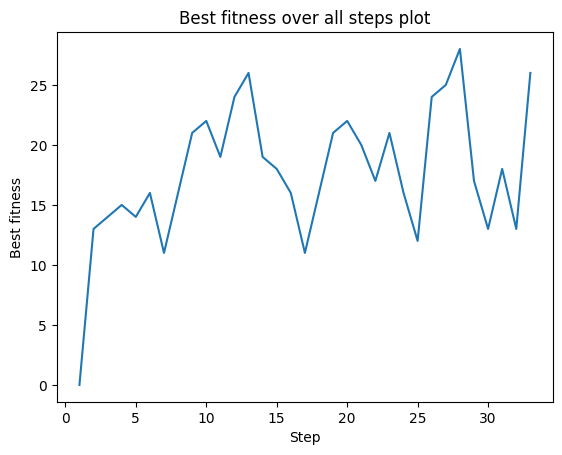

In [310]:
# Plot fitness_list over all steps.
plt.plot(list(range(1, len(fitness_list) + 1)), fitness_list)
plt.xlabel('Step')
plt.ylabel('Best fitness')
plt.title('Best fitness over all steps plot')
plt.show()

# Question 3 (37 points)

In this question we are going to implement gradient descent algorithm, test it on one-variable and two-variable functions and then visualize the path that algorithm takes to reach the global minimum.

## Imports

Feel free to import any library you need. You can use any library you want to complete this question.

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.misc import derivative
from findiff import FinDiff
import autograd
import numdifftools as nd

## One-variable functions

Fill these empty blocks according to the given functions:

Function 1:
\begin{equation}
f_1(x) = \frac{x^2}{1 - sin(\frac{x}{80})}\quad and \quad x \in [80, 150]
\end{equation}

In [94]:
def f1(x):
    # (1 point)
    f = np.power(x,2) * (1 - np.sin(x/80))
    return f

Function 2:
\begin{equation}
f_2(x) = \frac{sin(\frac{x}{10})}{x}\quad and \quad x \in [80, 250]
\end{equation}

In [57]:
def f2(x):
    # (1 point)
    f = np.sin(x/10)/x 
    return f

Complete the following function to draw a one-variable function and run the cells below it:

In [95]:
def draw_one_var(func, x_range):
    # (3 points)
    # y_values = func()
    x_values = np.linspace(x_range.start,x_range.stop,(x_range.stop - x_range.start) * 12)
    y_values = func(x_values)
    plt.plot(x_values, y_values)

    # Show the plot
    plt.show()

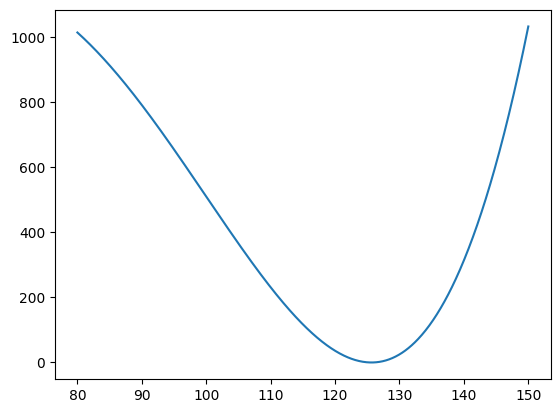

In [96]:
draw_one_var(f1, range(80, 150))

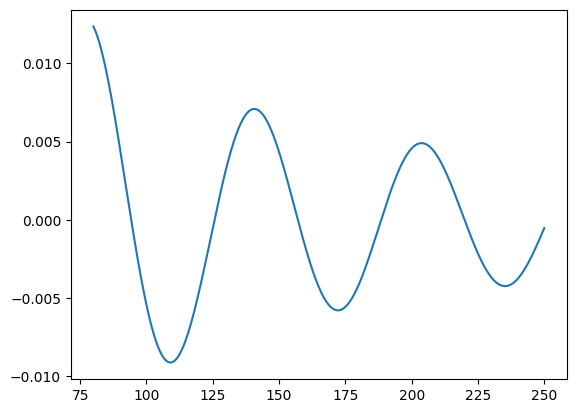

In [93]:
draw_one_var(f2, range(80, 250))

Now we want to choose a proper function and perform  gradient descent on it and find the minimum. Which funtion is a good choice for this? Why? (3 point)

The first function (F1) because the gradient descent works on "Convex" optimization problems and as we can see, F2 is NOT CONVEX !!!! 

Your answer:

Complete the function below and use it to find the minimum of your chosen function:

In [172]:
def one_var_gradient_descent(function, initial_point, learning_rate = 0.1, max_iters = 1000):
    # (6 points)
    x = initial_point
    y = function(x)
    x_sym = sp.Symbol('x')

    for i in range(max_iters):
        x = x - learning_rate * nd.Gradient(function)([x])
    y = function(x)
    return y, x

In [173]:
# Use one_var_gradient_descent function and find the minimum point: (2 points) 
# Your code here
print(one_var_gradient_descent(f1,100))

(0.0, 125.66370614357484)


Does it correspond to the plot of function? (1 point)

Yes! as we can see the minimum of f1 is around 125 and to be percise, it is around 125.66

Your answer:

## Two-variable functions

Now we want to do the same process for two-variable functions. Consider the following function and implement it in the cell below it:

Function 3:
\begin{equation}
f_3(x) = 5 x^2 + 2 y^2 - xy\quad and \quad x \in [-1, 1] \quad, y \in [-1, 1]
\end{equation}

In [213]:
def f3(x, y):
    # (1 point)
    f = lambda x,y : 5 * np.power(x,2) + 2 * np.power(y,2) - x * y
    f = f(x,y)
    return f

Complete the function below that performs two-dimensional gradient descent and returns the x and y sequence of the path from the initial point to the minimum:

In [243]:
def two_var_gradiant_descent(function, initial_point, learning_rate=0.01, max_iterations=1000):
    # (12 points)
    x_sequence = [initial_point[0]]
    y_sequence = [initial_point[1]]
    x = initial_point[0]
    y = initial_point[1]
    df_dx = sp.diff(f3(sp.Symbol('x'),sp.Symbol('y')), sp.Symbol('x'))
    df_dx = sp.lambdify(sp.symbols('x y'),df_dx)
    
    df_dy = sp.diff(f3(sp.Symbol('x'),sp.Symbol('y')), sp.Symbol('y'))
    df_dy = sp.lambdify(sp.symbols('x y'),df_dy)
    for i in range(max_iterations):
        epsilon = 10**-6
        # Your code here
        x_f = x - learning_rate * df_dx(x,y)
        y_f = y - learning_rate * df_dy(x,y)
        x = x_f
        y = y_f
        x_sequence.append(x)
        y_sequence.append(y)
    return x_sequence, y_sequence

Now we use the below function to visualize the calculated path of two_var_gradiant_descent:

In [260]:
def draw_points_sequence(func, x_sequence, y_sequence):
    X, Y = np.meshgrid(np.linspace(-1.0, 1.0, 100), np.linspace(-1.0, 1.0, 100))
    Z = func(X, Y)
    cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X, Y, Z, )
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(x_sequence, y_sequence, s=10, c="y")
    plt.show()


Find the minimum of the function 3 using two_var_gradiant_descent and then visualize the path with draw_points_sequence for the given parameters:
- initial_point = (-0.5, 0.5)
- learning_rate = 0.01
- max_iterations = 1000

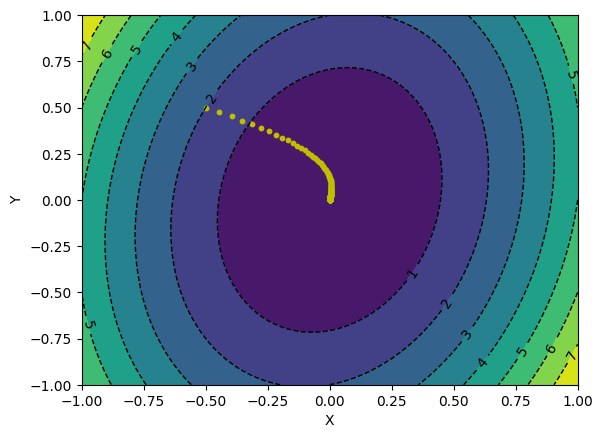

In [249]:
# Your code here (2 points)
'''
The specifics of the upcoming plot are unimportant,
 such as the color, labels, and other non-essential elements.
  The crucial aspect is the plot's overall structure.
'''
x_seq,y_seq = two_var_gradiant_descent(f3,(-0.5,0.5),learning_rate=0.01)
draw_points_sequence(f3,x_seq,y_seq)


Find the minimum of the function 3 using two_var_gradiant_descent and then visualize the path with draw_points_sequence for the given parameters:
- initial_point = (-0.5, 0.5)
- learning_rate = 0.1
- max_iterations = 1000

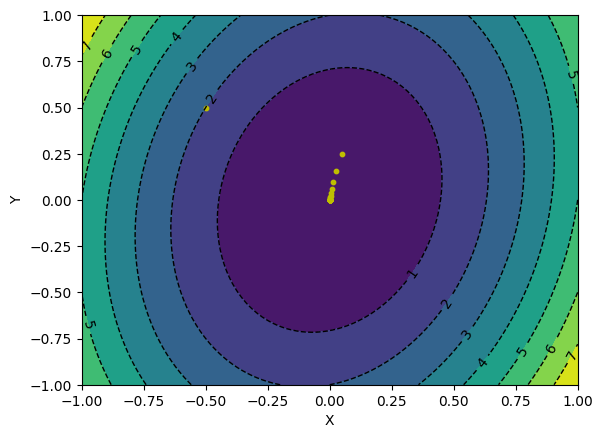

In [250]:
# Your code here (2 points)
'''
The specifics of the upcoming plot are unimportant,
 such as the color, labels, and other non-essential elements.
  The crucial aspect is the plot's overall structure.
'''
x_seq,y_seq = two_var_gradiant_descent(f3,(-0.5,0.5),learning_rate=0.1)
draw_points_sequence(f3,x_seq,y_seq)

Find the minimum of the function 3 using two_var_gradiant_descent and then visualize the path with draw_points_sequence for the given parameters:
- initial_point = (-0.5, 0.5)
- learning_rate = 0.2
- max_iterations = 1000

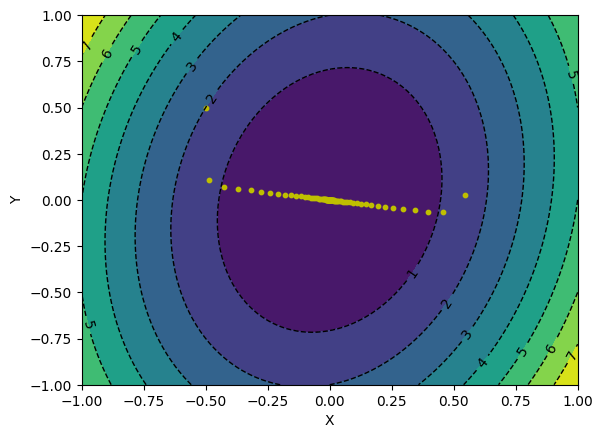

In [261]:
# Your code here (2 points)
'''
The specifics of the upcoming plot are unimportant,
 such as the color, labels, and other non-essential elements.
  The crucial aspect is the plot's overall structure.
'''
x_seq,y_seq = two_var_gradiant_descent(f3,(-0.5,0.5),learning_rate=0.19)
draw_points_sequence(f3,x_seq,y_seq)

Explain your observation from these three plots. What can we say about the learning rate? (5 points)

Your answer:

If the learning rate is low, we have <b>better accuracy</b> and probably will converge to the best answer but the down side is that it is <b>SLOW!</b> <br>
If the learning rate is high, we have <b>less accuracy</b> and the answers will <b>shift alot</b> (as seen in plot 3) <br>
So we need a learning rate which is not too high(to shift answers) or too low (so it would converge very slow)<br> so we could conclude that the second learning rate(0.1) could be an optimal option